# 1 

A partir del fichero "US_Crime_Rates_1960_2014", se pide:

1. Tratar el dataset como una serie temporal a partir de la columna Year. Siempre el eje X será el nuevo índice Year.

&lt;matplotlib.axes._subplots.AxesSubplot at 0x14c307490&gt;

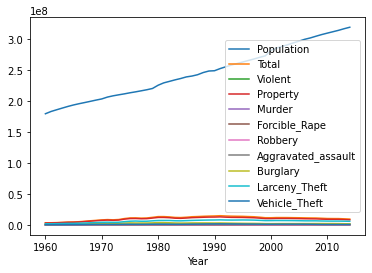

In [262]:
import pandas as pd
df = pd.read_csv("/Users/rochi/Desktop/TestFolder/DataScienceBootCampMIO/ProjectsDS/Week12/day4/data/US_Crime_Rates_1960_2014.csv")

df.set_index("Year", inplace=True)
df.plot()

2. Crea una red neuronal no convolucional de 3 capas y 32, 32, 64 neuronas respectivamente. Entrénala con los datos desde 1960 hasta 2010. Usa los datos desde 2010 hasta 2014 para predecir la columna "Murder" (y). ¿Se aproxima al número real?

In [263]:
df

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800
1965,193526000,4739400,387390,4352000,9960,23410,138690,215330,1282500,2572600,496900
1966,195576000,5223500,430180,4793300,11040,25820,157990,235330,1410100,2822000,561200
1967,197457000,5903400,499930,5403500,12240,27620,202910,257160,1632100,3111600,659800
1968,199399000,6720200,595010,6125200,13800,31670,262840,286700,1858900,3482700,783600


In [264]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import pathlib

import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers

Let's divide the data into training and testing
Now divide the data set into a training set and a test set.

We will use the test set in the final evaluation of our model.

In [265]:
train_df = df.loc[0:2009]
pred_df = df.loc[2010:2014]

In [266]:
train_stats = train_df.describe()
train_stats

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,50.000000,50.000000,50.000000,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,2.393682e+08,1.066010e+07,1.186246e+06,9.471829e+06,17591.620000,71565.100000,423098.700000,6.740171e+05,2.463916e+06,5.947908e+06,1.060093e+06
std,3.734415e+07,3.326915e+06,4.824789e+05,2.866195e+06,4383.846549,29432.263089,156353.971485,3.097760e+05,7.481883e+05,1.937470e+06,3.470580e+05
min,1.793232e+08,3.384200e+06,2.884600e+05,3.095700e+06,8530.000000,17190.000000,106670.000000,1.543200e+05,9.121000e+05,1.855400e+06,3.282000e+05
25%,2.086352e+08,8.620675e+06,8.451525e+05,7.789325e+06,15689.500000,47987.500000,385090.000000,3.999800e+05,2.123510e+06,4.366975e+06,9.285000e+05
50%,2.374490e+08,1.162122e+07,1.336660e+06,1.028604e+07,18439.000000,86450.000000,435105.000000,7.043000e+05,2.429913e+06,6.659906e+06,1.091784e+06
75%,2.670349e+08,1.320754e+07,1.472869e+06,1.170502e+07,20663.250000,93688.000000,531118.500000,9.098232e+05,3.100000e+06,7.241465e+06,1.245173e+06
max,3.070066e+08,1.487290e+07,1.932270e+06,1.296110e+07,24700.000000,109060.000000,687730.000000,1.135610e+06,3.795200e+06,8.142200e+06,1.661700e+06


In [267]:
X_train = train_df.drop('Murder', axis =1)
y_train = train_df.Murder

In [268]:
X_train.shape

(50, 10)

In [269]:
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_dim=X_train.shape[1]),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

In [270]:
model.summary()

Model: &quot;sequential_45&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_195 (Dense)            (None, 32)                352       
_________________________________________________________________
dense_196 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_197 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_198 (Dense)            (None, 1)                 65        
Total params: 3,585
Trainable params: 3,585
Non-trainable params: 0
_________________________________________________________________


In [271]:
optimizer = tf.keras.optimizers.RMSprop(
    learning_rate=0.08, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False,
    name='RMSprop')

model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

example_batch = train_df[:10]
example_result = model.predict(example_batch)
example_result

In [272]:
#history = model.fit(train_df, epochs=EPOCHS, validation_split = 0.2, verbose=0)

In [273]:
  history = model.fit(X_train, y_train,
    epochs=20,
    #callbacks=get_callbacks(X),
    verbose=1)

Epoch 1/20
2/2 [==============================] - 0s 14ms/step - loss: 13960521128104427520.0000 - mae: 2218051584.0000 - mse: 13960521128104427520.0000
Epoch 2/20
2/2 [==============================] - 0s 1ms/step - loss: nan - mae: nan - mse: nan
Epoch 3/20
2/2 [==============================] - 0s 3ms/step - loss: nan - mae: nan - mse: nan
Epoch 4/20
2/2 [==============================] - 0s 5ms/step - loss: nan - mae: nan - mse: nan
Epoch 5/20
2/2 [==============================] - 0s 3ms/step - loss: nan - mae: nan - mse: nan
Epoch 6/20
2/2 [==============================] - 0s 5ms/step - loss: nan - mae: nan - mse: nan
Epoch 7/20
2/2 [==============================] - 0s 4ms/step - loss: nan - mae: nan - mse: nan
Epoch 8/20
2/2 [==============================] - 0s 8ms/step - loss: nan - mae: nan - mse: nan
Epoch 9/20
2/2 [==============================] - 0s 4ms/step - loss: nan - mae: nan - mse: nan
Epoch 10/20
2/2 [==============================] - 0s 3ms/step - loss: nan - ma

In [274]:
history.history

{&#39;loss&#39;: [1.3960521128104428e+19,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 &#39;mae&#39;: [2218051584.0,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 &#39;mse&#39;: [1.3960521128104428e+19,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan]}

3. Ahora, prueba 3 optimizadores diferentes, ¿se modifica el resultado? ¿cuál te ha dado mejores resultados? 

In [275]:
X_train.shape

(50, 10)

In [276]:
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_dim=X_train.shape[1]),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

In [277]:
len(X_train.keys())

10

In [278]:
X_train.shape, y_train.shape

((50, 10), (50,))

In [279]:
lista_opt=['Adam','Adadelta', 'SGD']

for e in lista_opt:
    print(f'con el optimizador {e}: \n')
    model.compile(loss='mse',
                optimizer=e,
                metrics=['mae', 'mse'])

    history1=model.fit(X_train, y_train, epochs=20, verbose=0)
    print(history1.history)

con el optimizador Adam: 

{&#39;loss&#39;: [18064538075136.0, 11844824596480.0, 5633292107776.0, 2208420069376.0, 6588033138688.0, 1360865525760.0, 1450966777856.0, 3522134802432.0, 864052903936.0, 710422757376.0, 1945782059008.0, 553318088704.0, 371844677632.0, 1034963648512.0, 338892062720.0, 228807294976.0, 594527715328.0, 170510123008.0, 198097174528.0, 338395561984.0], &#39;mae&#39;: [3499762.0, 3371008.0, 2181660.75, 1293307.875, 2534721.0, 1029369.6875, 1098803.75, 1832936.75, 809306.8125, 760509.6875, 1371916.375, 655884.375, 500891.03125, 973150.5625, 493508.3125, 410779.53125, 742282.3125, 351279.28125, 354881.84375, 516860.375], &#39;mse&#39;: [18064538075136.0, 11844824596480.0, 5633292107776.0, 2208420069376.0, 6588033138688.0, 1360865525760.0, 1450966777856.0, 3522134802432.0, 864052903936.0, 710422757376.0, 1945782059008.0, 553318088704.0, 371844677632.0, 1034963648512.0, 338892062720.0, 228807294976.0, 594527715328.0, 170510123008.0, 198097174528.0, 338395561984.0]}
co

In [280]:
Adam_mae=[10689295.0, 2396781.75, 4156921.5, 5841647.5, 4516871.5, 1894222.5, 804718.1875, 2665369.5, 3227345.25, 2658985.5, 1374923.625, 282577.09375, 1266762.25, 1835329.625, 1706696.5, 1043824.375, 252854.078125, 657646.625, 1075148.375, 1048374.5625]

Adelta_mae=[750873.9375, 741079.0625, 731231.125, 721161.375, 711236.1875, 701244.625, 691374.5625, 681784.875, 672045.4375, 662355.1875, 653050.875, 643705.5, 634488.25, 625134.9375, 616020.5, 606988.375, 598050.25, 589278.875, 580494.75, 571976.375]

In [281]:
df = pd.DataFrame(list(zip(Adam_mae, Adelta_mae)), 
               columns =['Adam-MAE', 'Adelta-MAE']) 
df

,Adam-MAE,Adelta-MAE
0,1.068930e+07,750873.9375
1,2.396782e+06,741079.0625
2,4.156922e+06,731231.1250
3,5.841648e+06,721161.3750
4,4.516872e+06,711236.1875
5,1.894222e+06,701244.6250
6,8.047182e+05,691374.5625
7,2.665370e+06,681784.8750
8,3.227345e+06,672045.4375
9,2.658986e+06,662355.1875


In [282]:
df.max()

Adam-MAE      1.068930e+07
Adelta-MAE    7.508739e+05
dtype: float64

In [283]:
df.min()

Adam-MAE      252854.078125
Adelta-MAE    571976.375000
dtype: float64

4. Con el mejor optimizador modifica la función de activación a otra diferente. ¿Cuál ha dado mejor resultado?

In [284]:
## mejor optimizador = Adam

In [285]:
model = keras.Sequential([
    layers.Dense(32, activation='softmax', input_dim=X_train.shape[1]),
    layers.Dense(32, activation='softmax'),
    layers.Dense(64, activation='softmax'),
    layers.Dense(1)
  ])

model.compile(loss='mse',
                optimizer='Adam',
                metrics=['mae', 'mse'])

In [286]:
history2=model.fit(X_train, y_train, epochs=20, verbose=0)
print(history2.history)
print(type(history2.history))

{&#39;loss&#39;: [328298528.0, 328298400.0, 328298240.0, 328298080.0, 328297920.0, 328297728.0, 328297568.0, 328297440.0, 328297248.0, 328297088.0, 328296928.0, 328296768.0, 328296608.0, 328296448.0, 328296288.0, 328296128.0, 328295968.0, 328295808.0, 328295680.0, 328295456.0], &#39;mae&#39;: [17591.611328125, 17591.607421875, 17591.6015625, 17591.59765625, 17591.59375, 17591.587890625, 17591.5859375, 17591.580078125, 17591.57421875, 17591.5703125, 17591.564453125, 17591.560546875, 17591.556640625, 17591.552734375, 17591.546875, 17591.54296875, 17591.5390625, 17591.533203125, 17591.529296875, 17591.5234375], &#39;mse&#39;: [328298528.0, 328298400.0, 328298208.0, 328298080.0, 328297920.0, 328297728.0, 328297568.0, 328297440.0, 328297248.0, 328297088.0, 328296928.0, 328296768.0, 328296608.0, 328296448.0, 328296288.0, 328296128.0, 328295968.0, 328295808.0, 328295680.0, 328295456.0]}
&lt;class &#39;dict&#39;&gt;


In [287]:
history2.history.keys()

dict_keys([&#39;loss&#39;, &#39;mae&#39;, &#39;mse&#39;])

In [288]:
listmae = history2.history['mae']
listmae

[17591.611328125,
 17591.607421875,
 17591.6015625,
 17591.59765625,
 17591.59375,
 17591.587890625,
 17591.5859375,
 17591.580078125,
 17591.57421875,
 17591.5703125,
 17591.564453125,
 17591.560546875,
 17591.556640625,
 17591.552734375,
 17591.546875,
 17591.54296875,
 17591.5390625,
 17591.533203125,
 17591.529296875,
 17591.5234375]

In [289]:
minval = min(listmae)
minval

17591.5234375

def get_callbacks(train_df):
  return [
    tf.keras.callbacks.EarlyStopping(monitor='val_binary_crossentropy', patience=200),
    tf.keras.callbacks.TensorBoard(),
  ]

5. Ahora, haz que la red tenga 7 capas con 17,9,4,16,4,4,4 neuronas respectivamente. Utiliza la mejor función de activación y el mejor optimizador. ¿Esta red da mejor resultado? (Si da problema de memoria, prueba a quitar capas.)

In [290]:
model = keras.Sequential([
    layers.Dense(17, activation='softmax', input_dim=X_train.shape[1]),
    layers.Dense(16, activation='softmax'),
    layers.Dense(9, activation='softmax'),
    layers.Dense(4, activation='softmax'),
    layers.Dense(4, activation='softmax'), 
    layers.Dense(4, activation='softmax'),
    layers.Dense(1),
  ])

model.compile(loss='mse', optimizer='Adam', metrics=['mae', 'mse'])
model.fit(X_train, y_train, epochs=20, verbose=0)
print(hist.history)

{&#39;loss&#39;: [328301824.0, 328301600.0, 328301408.0, 328301184.0, 328300928.0, 328300704.0, 328300448.0, 328300256.0, 328300000.0, 328299808.0, 328299552.0, 328299328.0, 328299104.0, 328298880.0, 328298656.0, 328298400.0, 328298176.0, 328297952.0, 328297696.0, 328297472.0], &#39;mae&#39;: [17591.705078125, 17591.69921875, 17591.693359375, 17591.685546875, 17591.6796875, 17591.671875, 17591.666015625, 17591.66015625, 17591.654296875, 17591.6484375, 17591.640625, 17591.634765625, 17591.626953125, 17591.619140625, 17591.615234375, 17591.607421875, 17591.6015625, 17591.595703125, 17591.587890625, 17591.58203125], &#39;mse&#39;: [328301824.0, 328301600.0, 328301408.0, 328301184.0, 328300928.0, 328300704.0, 328300448.0, 328300256.0, 328300000.0, 328299808.0, 328299552.0, 328299360.0, 328299104.0, 328298880.0, 328298656.0, 328298400.0, 328298176.0, 328297952.0, 328297728.0, 328297472.0]}


In [295]:
X_train.head()

,Population,Total,Violent,Property,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960,179323175,3384200,288460,3095700,17190,107840,154320,912100,1855400,328200
1961,182992000,3488000,289390,3198600,17220,106670,156760,949600,1913000,336000
1962,185771000,3752200,301510,3450700,17550,110860,164570,994300,2089600,366800
1963,188483000,4109500,316970,3792500,17650,116470,174210,1086400,2297800,408300
1964,191141000,4564600,364220,4200400,21420,130390,203050,1213200,2514400,472800


In [301]:
final = model.predict(pred_df.drop('Murder', axis=1))
final

array([[0.8642978],
       [0.8642978],
       [0.8642978],
       [0.8642978],
       [0.8642978]], dtype=float32)

6. Por último, genera una red convolucional con 2 capas convolucionales sin MaxPool, ¿es mejor esta red que las anteriores? Prueba a cambiar la función de activación y el optimizador. ¿Se ha mejorado el resultado? ¿Cuál es mejor?

7. ¿Qué crees que pasaría si entrenamos la red hasta el año 2000 y predecimos desde el 2000 hasta el 2014? (Bonus: realiza el mismo proceso de los ejercicios 2-6 pero entrenando solo hasta el año 2000)